In [2]:
import numpy as np
import matplotlib.pyplot as plt
from wotan import flatten
import batman

In [3]:
### Defining parameters of transit
### We want hot jupiters. e.g. 10 days

params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 5.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 90.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = []                #limb darkening coefficients [u1, u2]
params.limb_dark = "uniform"

In [4]:
# Making time
time_start = 0
data_duration = 300
samples_per_day = 50
samples = int(data_duration * samples_per_day)
time = np.linspace(time_start, time_start + data_duration, samples)

m = batman.TransitModel(params, time)    #initializes model
flux = m.light_curve(params)



# Create noise and merge with flux
ppm = 2* 10**4 # Noise level in parts per million
noise = np.random.normal(0, 10**-6 * ppm, int(samples))
flux = flux + noise

<IPython.core.display.Javascript object>


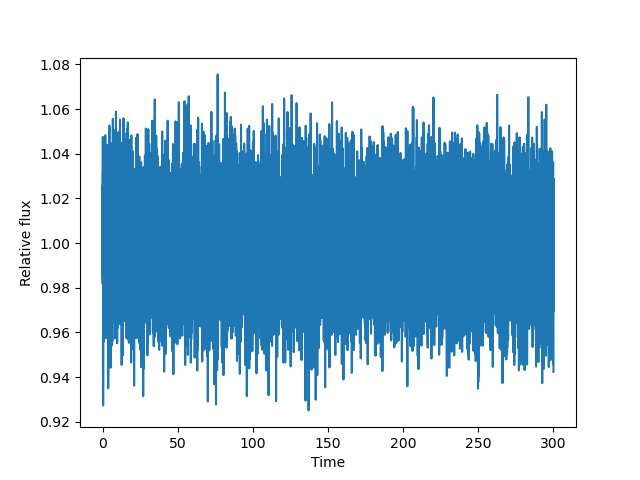

In [5]:
%matplotlib notebook
plt.plot(time, flux)
plt.xlabel("Time")
plt.ylabel("Relative flux")
plt.show()


In [6]:
detrend = flatten(time, flux,
        method='lowess',
        window_length = 0.6,    # The length of the filter window in units of ``time``
        break_tolerance = 0.3,    # Split into segments at breaks longer than that
        return_trend=True,    # Return trend and flattened light curve
        )

<IPython.core.display.Javascript object>


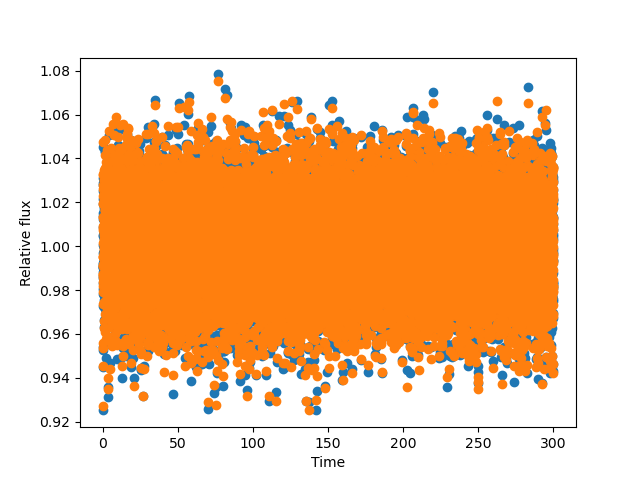

In [7]:
%matplotlib notebook
plt.scatter(time, detrend[0])
plt.scatter(time, flux)
plt.xlabel("Time")
plt.ylabel("Relative flux")
plt.show()